In [2]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [8]:
matches = pd.read_csv('../data/incidents/incidents_nodes_crosswalk.csv')
incidents = pd.read_csv('../data/incidents/geocoded_incidents.csv')
nodes = pd.read_csv('../data/nodes.csv')
edges = pd.read_csv('../data/edges.csv')

/var/folders/s_/ms4snwvs2b59mw5fvp44bvww0000gq/T/ipykernel_41383/520474257.py:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  edges = pd.read_csv('../data/edges.csv')


In [75]:
incidents['Mode'].value_counts()

Driver               379
Pedestrian           351
Motorcyclist         158
Passenger            131
Bicyclist             58
Other                 45
Motorized Scooter      3
Name: Mode, dtype: int64

In [76]:
df = matches
df = df.merge(nodes[['osmid', 'street_count', 'highway']], on=['osmid'])
df = df.merge(edges[['u', 'osmid', 'name', 'highway']], left_on=['osmid'], right_on=['u'], suffixes=['_node', '_u'])
# df = df.merge(edges[['v', 'osmid', 'name', 'highway']], left_on=['osmid_node', 'osmid_u'], right_on=['v', 'osmid'], suffixes=['_u', '_v'])
df = df.merge(incidents[['CaseNum', 'IncidentAddress', 'Mode']], on=['CaseNum'])
df.to_csv('data/test.csv')

In [80]:
df_peds = df.loc[df['Mode'] == 'Pedestrian']

In [98]:

df = df_peds[df_peds['CaseNum'] == df_peds.CaseNum[231]]
df

,Unnamed: 0,CaseNum,osmid_node,distance,street_count,highway_node,u,osmid_u,name,highway_u,IncidentAddress,Mode
225,0,23-05134,90290185,178.653102,3,NaN,90290185,10514921,64th Street,residential,Intersection of Fruitridge Road and 65th Stree...,Pedestrian
226,0,23-05134,90290185,178.653102,3,NaN,90290185,"[709199843, 605173486]",Fruitridge Road,secondary,Intersection of Fruitridge Road and 65th Stree...,Pedestrian
227,0,23-05134,90290187,44.604222,4,NaN,90290187,10530612,65th Street Expressway,secondary,Intersection of Fruitridge Road and 65th Stree...,Pedestrian
228,0,23-05134,90290187,44.604222,4,NaN,90290187,543266903,Fruitridge Road,secondary,Intersection of Fruitridge Road and 65th Stree...,Pedestrian
229,0,23-05134,2493197974,180.242395,1,NaN,2493197974,241726417,Digger Way,residential,Intersection of Fruitridge Road and 65th Stree...,Pedestrian
230,0,23-05134,3262602576,61.498849,4,NaN,3262602576,1029945084,65th Street Expressway,secondary,Intersection of Fruitridge Road and 65th Stree...,Pedestrian
231,0,23-05134,3262602576,61.498849,4,NaN,3262602576,709199847,Fruitridge Road,secondary,Intersection of Fruitridge Road and 65th Stree...,Pedestrian
232,0,23-05134,6665383885,41.863004,4,NaN,6665383885,885405988,Fruitridge Road,secondary,Intersection of Fruitridge Road and 65th Stree...,Pedestrian
233,0,23-05134,6665383885,41.863004,4,NaN,6665383885,"[890001068, 1046446343]",65th Street Expressway,secondary,Intersection of Fruitridge Road and 65th Stree...,Pedestrian
234,0,23-05134,8233346735,6.793980,4,NaN,8233346735,10530612,65th Street Expressway,secondary,Intersection of Fruitridge Road and 65th Stree...,Pedestrian


In [99]:
image_ids = df.osmid_node.unique()
images = []
for image_id in image_ids:
    try:
        img = np.asarray(Image.open(f'../data/images/satellite/{image_id}.png'))
        images.append(img)
    except:
        print(f'{image_id} not yet downloaded')

In [55]:
%matplotlib inline

In [100]:
len(images)

6

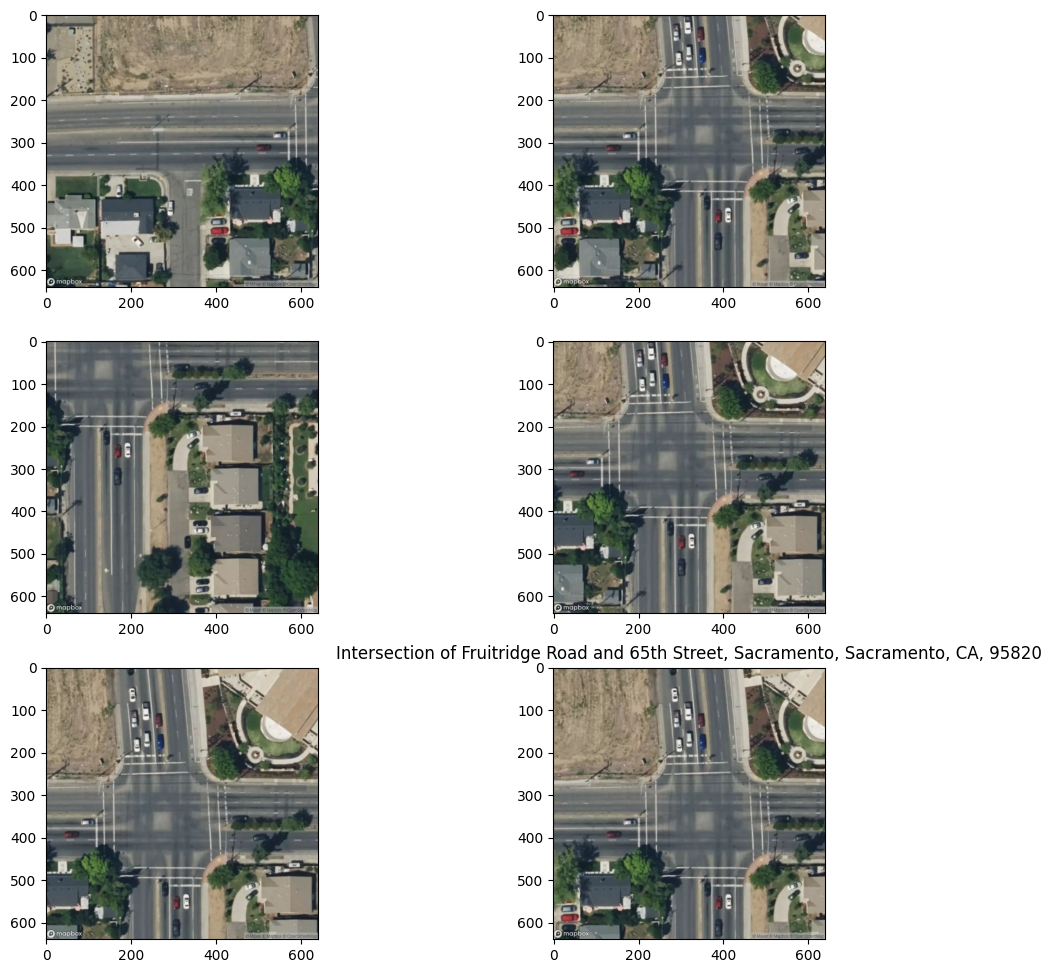

In [101]:
_, axs = plt.subplots(3, 2, figsize=(12, 12))
axs = axs.flatten()
for img, ax in zip(images, axs):
    ax.imshow(img)
plt.title(df.IncidentAddress.unique()[0])
plt.show()